# Exam vB, PROBLEM 1
Maximum Points = 14

In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

---

## 1. [4p]
Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below density using rejection sampling:

$$f[x] = C x^{0.2} (1 - x)^{1.3}$$

for $0 \le x \le 1$, where $C$ is a value such that $f$ above is a density (i.e. integrates to one).

Hint: you do not need to know the value of $C$ to perform rejection sampling.

---

## 2. [2p]
Produce 100000 samples (use fewer if it takes too long) and put the answer in `problem1_samples` from the above distribution and plot the histogram.

---

## 3. [2p]
Define $X$ as a random variable with the density given in part 1. Denote $Y = \sin(10X)$ and use the above 100000 samples to estimate

$$E[Y]$$

and store the result in `problem1_expectation`.

---

## 4. [2p]
Use Hoeffdings inequality to produce a 95% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`.

---

## 5. [4p]
Can you calculate an approximation of the value of $C$ from part 1 using random samples? Provide a plot of the histogram from part 2 together with the true density as a curve, recall that this requires the value of $C$. Explain what method you used and what answer you got.

---

In [36]:
# All the necessary packages that could be necessary:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


---

## 1. [4p]
Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below density using rejection sampling:

$$f[x] = C x^{0.2} (1 - x)^{1.3}$$

for $0 \le x \le 1$, where $C$ is a value such that $f$ above is a density (i.e. integrates to one).

Hint: you do not need to know the value of $C$ to perform rejection sampling.

---

In [37]:
# Part 1
def problem1_rejection(n_samples):
    a = 0.2
    b = 1.3

    # Unnormalized target density
    def f_tilde(x):
        return x**a * (1 - x)**b

    # Maximum of f_tilde
    x_star = a / (a + b)
    M = f_tilde(x_star)
    #print(M)

    samples = []
    n_trials = 0

    while len(samples) < n_samples:
        x = np.random.uniform(0, 1)   # proposal g(x) = 1
        u = np.random.uniform(0, 1)
        n_trials += 1

        if u <= f_tilde(x) / M:
            samples.append(x)

    samples = np.array(samples)
    acceptance_rate = n_samples / n_trials

    return samples




# ratio = f(x) / gx
# M_est = ratio.max()
# print("Estimated M: ", M_est)

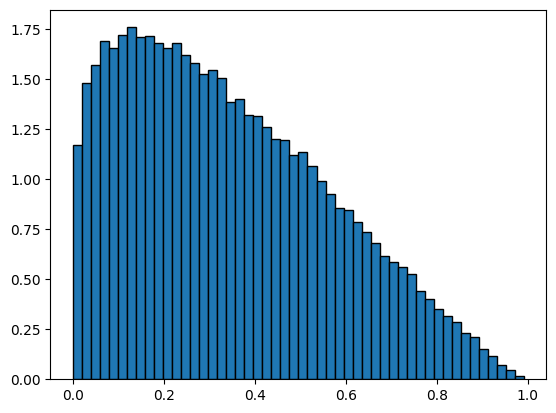

In [45]:
# Part 2
n_samples = 100000
problem1_samples = problem1_rejection(n_samples)



plt.hist(problem1_samples, bins=50, density=True, edgecolor = "black")
plt.show()

In [39]:
# Part 3
Y = np.sin(10*problem1_samples)

Est = np.mean(Y)

problem1_expectation = Est

print(problem1_expectation)

0.1814044156710977


In [40]:
# Part 4
a,b = 0, 1
alpha = 0.05
n = len(problem1_samples)

epsilon = (b-a) * np.sqrt(np.log(alpha/2) / (-2*n))

lower = problem1_expectation - epsilon
upper = problem1_expectation + epsilon


problem1_interval = (lower, upper)

print(f"This is hoeffding interval: {problem1_interval}")

This is hoeffding interval: (np.float64(0.1771097215876303), np.float64(0.18569910975456508))


$$f[x] = C x^{0.2} (1 - x)^{1.3}$$

In [50]:
# Part 5
n_samples = 100000
samples = np.random.uniform(0.0, 1.0, size=n_samples)

I = ((1/n_samples) * np.sum(samples**0.2 * (1-samples)**1.3))

C_hat = 1/I

problem1_C = C_hat
problem1_C

np.float64(3.101546838490805)

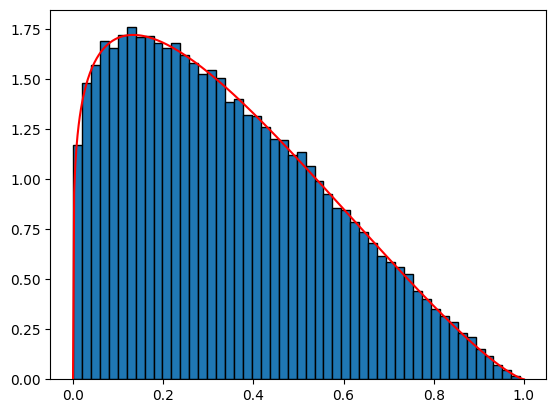

In [51]:
# Part 5
# Write your code to produce the plot here
#XXXXXXX

plt.hist(problem1_samples, bins=50, density=True, edgecolor = "black")

x_vals = np.linspace(0, 1, 400)

FX = problem1_C * x_vals **0.2 * (1-x_vals)**1.3


plt.plot(x_vals, FX, color="red")

plt.show()

In [52]:
# This cell is just to check that you got the correct formats of your answer
import numpy as np

try:
    assert(isinstance(problem1_rejection(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray))
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_expectation, float))
except:
    print("Try again. your problem1_expectation is not a float")
else:
    print("Good, your problem1_expectation is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_rejection_2(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_rejection_2")
else:
    print("Good, your problem1_rejection_2 returns a numpy array")

Good, your problem1_rejection returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_expectation is a float
Good, your problem1_interval is a tuple or list of length 2
Try again. You should return a numpy array from problem1_rejection_2


## Exam vB, PROBLEM 2
**Maximum Points = 13**

Let us build a proportional model ($P(Y = 1 | X) = G(\beta_0 + \beta \cdot X)$ where $G$ is the logistic function)
for the spam vs not spam data. Here we assume that the features are presence vs not presence of a
word, let $X_1, X_2, X_3$ denote the presence (1) or absence (0) of the words (“free”, “prize”, “win”).

---

### 1. [2p]
Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has
shape $(n_{\text{emails}}, 3)$ where each feature in `problem2_X` corresponds to
$X_1, X_2, X_3$ from above, `problem2_Y` which has shape $(n_{\text{emails}},)$ and
consists of a 1 if the email is spam and 0 if it is not.

Split this data into a train–calibration–test set where we have the split 40%, 20%, 40%.
Put this data in the designated variables in the code cell.

---

### 2. [4p]
Follow the calculation from the lecture notes where we derive the logistic regression
and implement the final loss function inside the class `ProportionalSpam`.
You can use the Test cell to check that it gives the correct value for a test-point.

---

### 3. [4p]
Train the model `problem2_ps` on the training data.  
The goal is to calibrate the probabilities output from the model.

Start by creating a new variable `problem2_X_pred` (shape $(n_{\text{samples}}, 1)$)
which consists of the predictions of `problem2_ps` on the calibration dataset.

Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`,
store this trained model in `problem2_calibrator`.

---

### 4. [3p]
Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make
final predictions on the testing data, store the prediction in
`problem2_final_predictions`.

Compute the $0 - 1$ test-loss and store it in `problem2_01_loss` and provide a
99% confidence interval of it.  
Store this interval in the variable `problem2_interval`
(this should again be a tuple as in Problem 1).


-----
## Exam vB, PROBLEM 2
**Maximum Points = 13**

Let us build a proportional model ($P(Y = 1 | X) = G(\beta_0 + \beta \cdot X)$ where $G$ is the logistic function)
for the spam vs not spam data. Here we assume that the features are presence vs not presence of a
word, let $X_1, X_2, X_3$ denote the presence (1) or absence (0) of the words (“free”, “prize”, “win”).

---

### 1. [2p]
Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has
shape $(n_{\text{emails}}, 3)$ where each feature in `problem2_X` corresponds to
$X_1, X_2, X_3$ from above, `problem2_Y` which has shape $(n_{\text{emails}},)$ and
consists of a 1 if the email is spam and 0 if it is not.

Split this data into a train–calibration–test set where we have the split 40%, 20%, 40%.
Put this data in the designated variables in the code cell.

---



In [67]:
# Part 1

data = pd.read_csv("data/spam.csv", usecols=[0, 1], encoding="latin1")

spam = data["v1"]
text = data["v2"]

words = ["free", "prize", "win"]



problem2_X = np.column_stack([text.str.contains(w, case=False, regex=False) for w in words]).astype(int)
# print(problem2_X.shape)
# print(problem2_X)

problem2_Y = (spam == "spam")

n = len(problem2_Y)

n_train = int(n * 0.4)
n_calib = int(n * 0.2)


problem2_X_train = problem2_X[:n_train]
problem2_X_calib = problem2_X[n_train: n_train+n_calib]
problem2_X_test = problem2_X[n_train+n_calib:]

problem2_Y_train = problem2_Y[:n_train]
problem2_Y_calib = problem2_Y[n_train: n_train+n_calib]
problem2_Y_test = problem2_Y[n_train+n_calib:]


print(problem2_X_train.shape,
      problem2_X_calib.shape,
      problem2_X_test.shape,
      problem2_Y_train.shape,
      problem2_Y_calib.shape,
      problem2_Y_test.shape)


(2228, 3) (1114, 3) (2230, 3) (2228,) (1114,) (2230,)


### 2. [4p]
Follow the calculation from the lecture notes where we derive the logistic regression
and implement the final loss function inside the class `ProportionalSpam`.
You can use the Test cell to check that it gives the correct value for a test-point.

---



In [72]:
# Part 2
class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None

    # define the objective/cost/loss function we want to minimise
    def loss(self, X, Y, coeffs):
        Z_i = (2 * Y) - 1
        B0 = coeffs[0]
        Bi = coeffs[1:]
        loss = np.mean(np.log(1+np.exp(-Z_i * (B0 + X @ Bi))))
        return loss

    def fit(self, X, Y):
        import numpy as np
        from scipy import optimize
        # Use the f above together with an optimization method from scipy
        # to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X, Y, coeffs)
        initial_arguments = np.zeros(shape=X.shape[1] + 1)
        self.result = optimize.minimize(opt_loss,
                                        initial_arguments,
                                        method='cg')
        self.coeffs = self.result.x

    def predict(self, X):
        # Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x) / (1 + np.exp(x))
            return np.round(
                10 * G(np.dot(X, self.coeffs[1:]) + self.coeffs[0])
            ) / 10  # This rounding is to help you with the calibration


### 3. [4p]
Train the model `problem2_ps` on the training data.  
The goal is to calibrate the probabilities output from the model.

Start by creating a new variable `problem2_X_pred` (shape $(n_{\text{samples}}, 1)$)
which consists of the predictions of `problem2_ps` on the calibration dataset.

Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`,
store this trained model in `problem2_calibrator`.

---


In [77]:
# Part 3
problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train, problem2_Y_train)

problem2_X_pred = problem2_ps.predict(problem2_X_calib).reshape(-1, 1)
print(problem2_X_pred.shape)


# Calibrator training input = base model predictions (on calibration set)
# Calibrator target = true labels (on calibration set)
problem2_calibrator = DecisionTreeRegressor()
problem2_calibrator.fit(problem2_X_pred, problem2_Y_calib)

(1114, 1)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0



### 4. [3p]
Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make
final predictions on the testing data, store the prediction in
`problem2_final_predictions`.

Compute the $0 - 1$ test-loss and store it in `problem2_01_loss` and provide a
99% confidence interval of it.  
Store this interval in the variable `problem2_interval`
(this should again be a tuple as in Problem 1).


In [85]:
# Part 4

# These are the predicted probabilities
problem2_final_predictions = problem2_calibrator.predict(problem2_ps.predict(problem2_X_test).reshape(-1, 1))

# In order to compute this loss we first need to convert the predicted probabilities to a decision
# recall the Bayes classifier?

problem2_hard_predictions = (problem2_final_predictions >= 0.5).astype(int)

# Compute the 0-1 test loss (misclassification rate)
errors = (problem2_hard_predictions != problem2_Y_test).astype(int)

problem2_01_loss = np.mean(errors)


# Recall the interval is given as a tuple (a,b) or a list [a,b]

a,b = 0,1
alpha = 0.01
n = len(problem2_Y_test)

epsilon = (b-a) * np.sqrt(np.log(alpha / 2) / (-2*n))

lower = problem2_01_loss - epsilon
upper = problem2_01_loss + epsilon

problem2_interval = (lower, upper)


print(f"This is interval: {problem2_interval}")


This is interval: (np.float64(0.06867216655476562), np.float64(0.13760586035106398))


Local Test for Exam vB, PROBLEM 2 Evaluate cell below to make sure your answer is valid.
You should not modify anything in the cell below when evaluating it to do a local test of your
solution. You may need to include and evaluate code snippets from lecture notebooks in cells above
to make the local test work correctly sometimes (see error messages for clues). This is meant to
help you become efficient at recalling materials covered in lectures that relate to this problem. Such
local tests will generally not be available in the exam

In [86]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(
        np.array([[1,0,1],[0,1,1]]),
        np.array([1,0]),
        np.array([1.2,0.4,0.3,0.9])
    )
    assert (np.abs(test_loss - 1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

Your loss was correct for a test point


## Exam vB, PROBLEM 3
**Maximum Points = 13**

Consider the following four Markov chains, answer each question for all chains:
![Markov chain diagrams](exam240607-markovImages.png)

### 1. [2p]
What is the transition matrix?

### 2. [2p]
Is the Markov chain irreducible?

### 3. [3p]
Is the Markov chain aperiodic?  
What is the period for each state?

Hint: Recall our definition of period:  
Let $$T := \{ t \in \mathbb{N} : P^t(x, x) > 0 \}$$  
and the greatest common divisor of $T$ is the period.

### 4. [3p]
Does the Markov chain have a stationary distribution, and if so, what is it?

### 5. [3p]
Is the Markov chain reversible?


In [ ]:
# PART 1
#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)
problem3_A = XXX
problem3_B = XXX
problem3_C = XXX
problem3_D = XXX


In [ ]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False
problem3_A_irreducible = XXX
problem3_B_irreducible = XXX
problem3_C_irreducible = XXX
problem3_D_irreducible = XXX


In [ ]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False
problem3_A_is_aperiodic = XXX
problem3_B_is_aperiodic = XXX
problem3_C_is_aperiodic = XXX
problem3_D_is_aperiodic = XXX

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)
problem3_A_periods = XXX
problem3_B_periods = XXX
problem3_C_periods = XXX
problem3_D_periods = XXX


In [ ]:
# PART 4
#------------------------STATIONARY DISTRIBUTION-----------------
# Answer each one with a True or False
problem3_A_has_stationary = XXX
problem3_B_has_stationary = XXX
problem3_C_has_stationary = XXX
problem3_D_has_stationary = XXX

# Answer the following with the stationary distribution as a numpy array of shape (n_states,)
# if the Markov chain has a stationary distribution otherwise answer with False
problem3_A_stationary_dist = XXX
problem3_B_stationary_dist = XXX
problem3_C_stationary_dist = XXX
problem3_D_stationary_dist = XXX


In [ ]:
# PART 5
#------------------------REVERSIBLE-----------------
# Answer each one with a True or False
problem3_A_is_reversible = XXX
problem3_B_is_reversible = XXX
problem3_C_is_reversible = XXX
problem3_D_is_reversible = XXX
